In [10]:
import numpy as np
from tensorflow.keras import datasets, utils, optimizers
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers, models

In [12]:
NUM_CLASSES = 10

In [13]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [14]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [15]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)

In [16]:
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [37]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [38]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(300, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(10, activation="softmax"))

/home/enrique/virtual_environments/generative_course/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#No sequential
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
output_layer = layers.Dense(10, activation="softmax")(x)
model = models.Model(input_layer, output_layer)


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 968,560 (3.69 MB)

 Trainable params: 968,560 (3.69 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.3, shuffle=True)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2676 - loss: 2.0326 - val_accuracy: 0.3577 - val_loss: 1.7688
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3723 - loss: 1.7432 - val_accuracy: 0.3915 - val_loss: 1.6937
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4134 - loss: 1.6481 - val_accuracy: 0.4043 - val_loss: 1.6570
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.4329 - loss: 1.5785 - val_accuracy: 0.4378 - val_loss: 1.5877
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4503 - loss: 1.5399 - val_accuracy: 0.4229 - val_loss: 1.6189
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4571 - loss: 1.5131 - val_accuracy: 0.4558 - val_loss: 1.5366
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4703 - loss: 1.4773 - val_accuracy: 0.4527 - val_loss: 1.5565
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4658 - loss: 

In [42]:
history = model.history

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


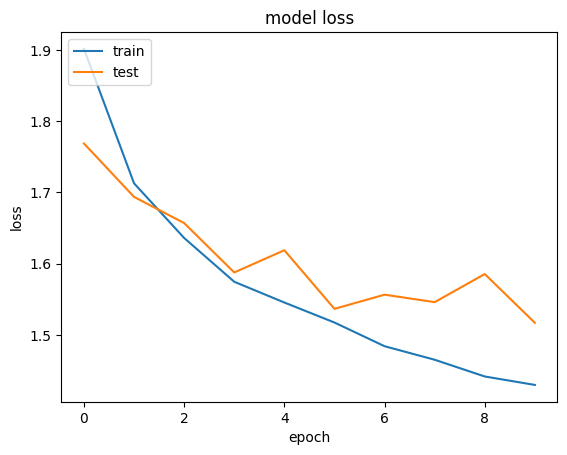

In [43]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
prediction = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4684 - loss: 1.4928


In [23]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",preds_single

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

 92/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2025-02-13 11:42:43.299087: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


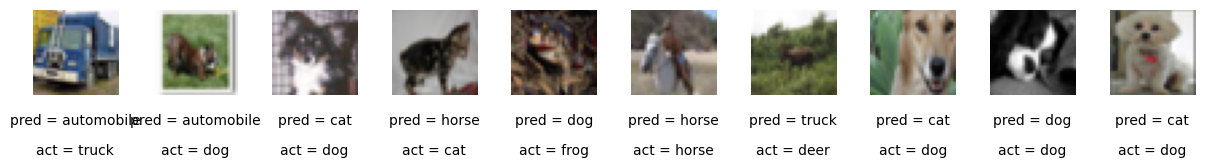

In [23]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

In [8]:
#Now we do it with  a convolutional neural network

In [17]:
input_layer = layers.Input(shape=(32, 32, 3))
conv_layer_1 = layers.Conv2D(filters=10, kernel_size=(3, 3), strides=1, padding="same")(input_layer)
conv_layer_2 = layers.Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding="same")(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(10, activation="softmax")(flatten_layer)
model = models.Model(input_layer, output_layer)



W0000 00:00:1739446827.572154  166983 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 20)     │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        51,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,310 (208.24 KB)

 Trainable params: 53,310 (208.24 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=10, validation_split=0.3, shuffle=True, verbose=1)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5134 - loss: 1.4369 - val_accuracy: 0.3632 - val_loss: 1.9295
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5249 - loss: 1.4291 - val_accuracy: 0.3655 - val_loss: 1.9340
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5178 - loss: 1.4322 - val_accuracy: 0.3610 - val_loss: 1.9488
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5228 - loss: 1.4232 - val_accuracy: 0.3612 - val_loss: 1.9474
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5208 - loss: 1.4320 - val_accuracy: 0.3647 - val_loss: 1.9542
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5235 - loss: 1.4214 - val_accuracy: 0.3602 - val_loss: 1.9582
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5218 - loss: 1.4179 - val_accuracy: 0.3649 - val_loss: 1.9622
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5261 - loss: 1.4136 - val_accuracy: 0.

In [57]:
prediction = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3631 - loss: 1.9648


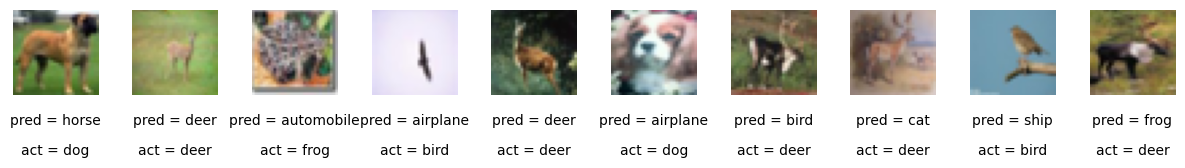

In [68]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

In [59]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


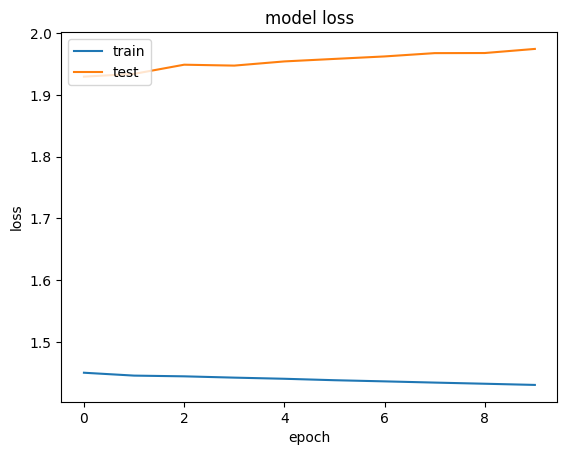

In [60]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Proper CNN network with dropout or batch normalisation

In [62]:
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(10, activation="softmax")(x)
model = models.Model(input_layer, output_layer)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [65]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


In [66]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=10, validation_split=0.3, shuffle=True, verbose=1)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.3544 - loss: 1.9221 - val_accuracy: 0.4892 - val_loss: 1.4371
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.5430 - loss: 1.2919 - val_accuracy: 0.5393 - val_loss: 1.3232
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 29s 54ms/step - accuracy: 0.6098 - loss: 1.1052 - val_accuracy: 0.5627 - val_loss: 1.2711
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.6571 - loss: 0.9795 - val_accuracy: 0.5153 - val_loss: 1.4558
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.6839 - loss: 0.9037 - val_accuracy: 0.6675 - val_loss: 0.9574
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - accuracy: 0.7067 - loss: 0.8308 - val_accuracy: 0.6641 - val_loss: 0.9775
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.7346 - loss: 0.7691 - val_accuracy: 0.6718 - val_loss: 0.9454
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.7467 - loss: 0.7311 - 

In [67]:
prediction = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6617 - loss: 1.0112


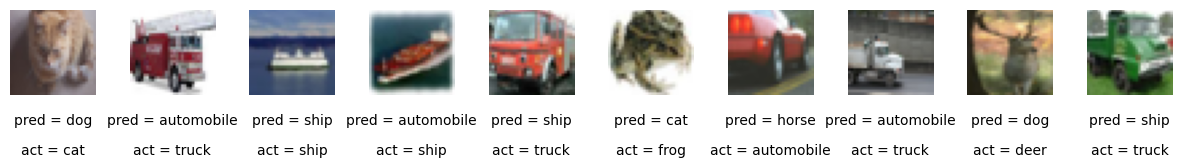

In [69]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


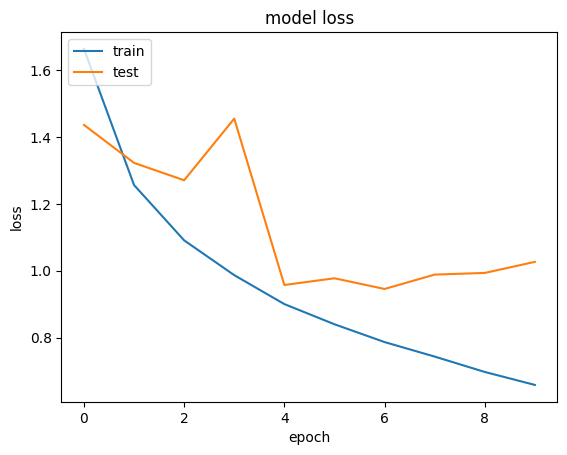

In [70]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'accuracy'], loc='upper left')
plt.show()